## **MACHINE LEARNING - LAB 1**
## **K-MEANS ALGORITHM**



In [ ]:
import numpy as np # NumPy is the fundamental package for scientific computing with Python.
from matplotlib import pyplot as plt # Matplotlib is a Python 2D plotting library.
from sklearn import datasets # sklearn is a very extense and efficient machine learning library.

## <b>Exercise 2</b>


[[-11.12685353   3.94149032]
 [  0.52671784   8.7864911 ]
 [  8.32814791   7.5300114 ]]
[[-9.20740911  3.82816235]
 [ 1.71964617  7.99836227]
 [ 7.79763236  6.33209493]]


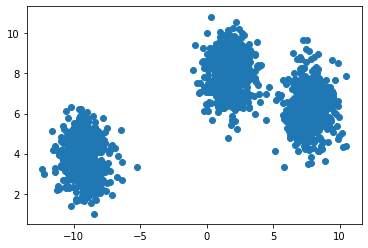

In [ ]:
from sklearn.datasets import make_blobs

#Creating the dataset with 1500 samples:
n_samples = 1500
random_state = 20
k=3
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

#Plot generated points:
plt.scatter(X[:, 0], X[:, 1])

#Defining the function kmeans with parameters X and k
def kmeans(X,k):
    C = np.zeros((k,2)) #C is an array full of zeros of shape (k,2)
    N = np.zeros((len(X))) #N is an array full of zeros of shape (len(X), 1)
    v = False #v is a boolean variable initialized as False
    
    #For loop to create 3 random points where the clusters will be located at the beginning of the program
    for n in range(k):
        r = np.random.randint((len(X)))
        C[n] = X[r]
    print(C)
    
    while (v == False):
        dist = np.zeros((k)) #dist is an array full of zeros of shape (k,1)
        new_centers = np.zeros((k,2)) #compare is an array full of zeros os shape (k,2)
        
        #For loop to compute the distance between all the points
        for i in range(len(X)):
            for j in range(k):
                p1 = C[j][0] - X[i][0] #Computing the distance between the x coordinates of the point
                p2 = C[j][1] - X[i][1] #Computing the distance between the y coordinates of the point
                square = (p1**2) + (p2**2) #Computing the sum of p1 and p2 squared
                dist[j] = np.sqrt((square)) #Computing the square root of the sum of p1 and p2 squared
            N[i] = np.argmin(dist) #Selecting the position of the array where the minimum distance stands
            
        for z in range(k):
            mean = 0 #mean is a integer variable initialized as 0
            it = 0 #it is an iteration counter
            for y in range(len(X)):
                if (N[y] == z):
                    mean = mean + X[y] #In case that the value of N equals z, we add the value of X to the total mean
                    it +=1 #We add one iteration to our counter
            if (it != 0): 
                mean = mean/it #In case there is any iteration, we calculate the mean of the points to calculate the new center of the cluster
            new_centers[z] = mean #And we put the new center point into the array new_centers
            
        if (np.array_equal(C, new_centers) == True): #In case the value of C and new_centers are the same, we break the while loop
            v = True
        else:
            C = new_centers #In case the value is not equal, we assign the new center to C
            
    return C #We return the new centers values

print(kmeans(X,k))

## <b>Exercise 3</b>

We start importing sklearn and generating the dataset with the function make_bolbs:

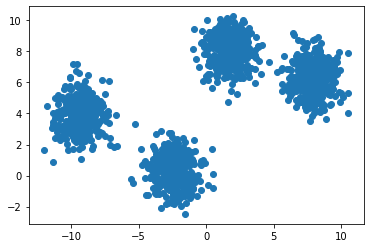

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Create dataset:
n_samples = 1500
random_state = 20
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=4)

#Plot generated points:
plt.scatter(X[:, 0], X[:, 1])

We now call the KMeans function from sklearn to do clustering with 2 clusters:

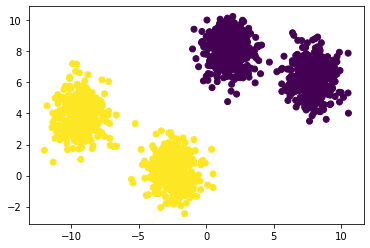

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

a) Do the same for different number of clusters (e.g. N=2,4,6). Explain the results.

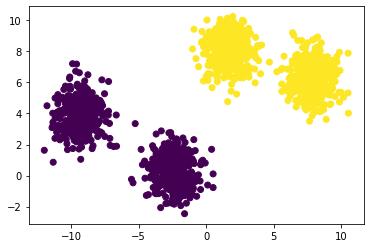

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

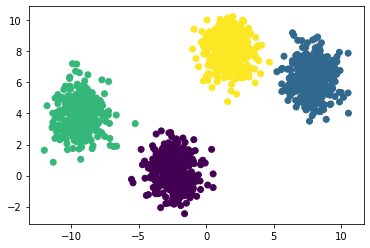

In [ ]:
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

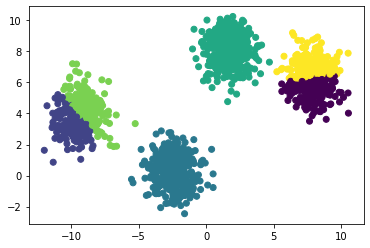

In [ ]:
y_pred = KMeans(n_clusters=6).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

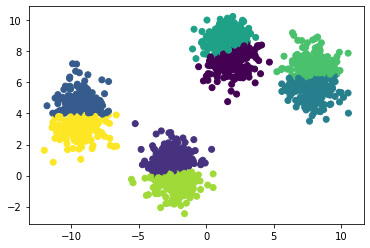

In [ ]:
y_pred = KMeans(n_clusters=8).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

<b>ANSWER</b>

As we increase the number of clusters, we can see that the points are grouped into different more precise clusters of different color, so that their adjustment is more precise.

We now introduce a transformation in our dataset to change it's shape:

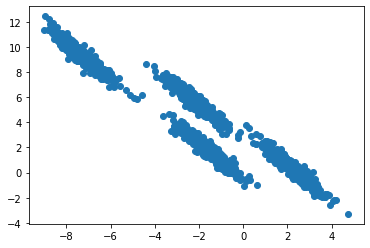

In [ ]:
#Apply the transformation to our dataset
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_transf = np.dot(X, transformation)
#Plot generated points:
plt.scatter(X_transf[:, 0], X_transf[:, 1])

b) Do clustering on this new dataset. What do you observe? Why?

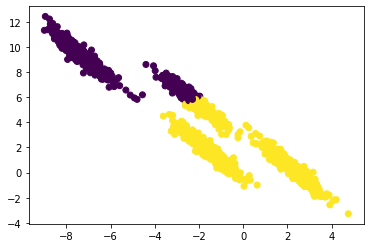

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X_transf)
plt.scatter(X_transf[:, 0], X_transf[:, 1], c=y_pred)

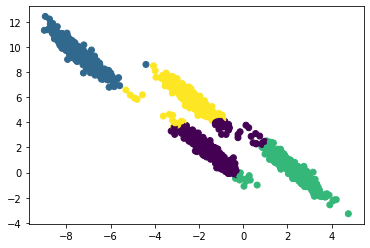

In [ ]:
y_pred = KMeans(n_clusters=4).fit_predict(X_transf)
plt.scatter(X_transf[:, 0], X_transf[:, 1], c=y_pred)

<b>ANSWER</b>

As we can see in the previous graphics, these clusters are not circular like the ones in the previous section, but they are elongated. In this case, determining the clusters with the naked eye will be more difficult, because it will depend on the orientation that we choose will be one or the other. For example, we could determine that each point grouping is a cluster in its elongated shape, or cut the elongated pieces vertically and thus determine the clusters.
Once the algorithm has been executed and the number of clusters has increased, we can see that the vertical form has been chosen to create the clusters, and as in the previous section, the more clusters chosen, the classification will be more effective.

Finally, we create another dataset where the variance of the different bulbs is different:

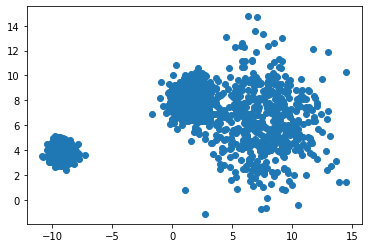

In [ ]:
# Create dataset with different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1])

c) Do clustering on this new dataset. What do you observe?

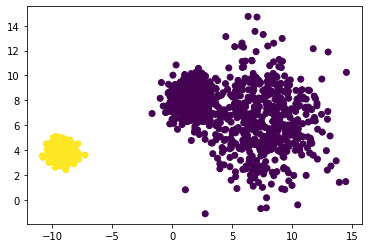

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)

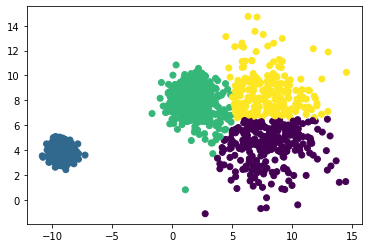

In [ ]:
y_pred = KMeans(n_clusters=4).fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)

<b>ANSWER</b>

In this case, with the naked eye, we can determine 2 clusters: one small on the right, and one large on the left. By simple intuition, it can be determined that when more clusters are created, the small cluster on the right will remain intact, since it is far from the rest of the points, and instead, the large cluster will be divided into smaller ones as we have seen when we have algorithm executed with 4 clusters.